In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
import os

In [278]:
from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

# Preprocessing

In [279]:
PATH = "../data/easteregg_everything_so_far_250"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [280]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup_fullscreen': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        print(data_in, file)
        pass
    file_data.append(data_in)
    
data = pd.concat(file_data)
diff_program_means_dict['windup_fullscreen']

[3617.832,
 3627.72,
 3133.5403225806454,
 3896.144,
 3548.856,
 3569.016,
 3039.32,
 4331.092,
 3564.436,
 3565.616,
 3574.476,
 4367.116,
 3711.42,
 4445.324,
 3518.344,
 3680.816,
 3157.409756097561,
 2752.537037037037,
 4314.572,
 3672.084,
 3829.16,
 4212.24,
 2283.392,
 3666.704,
 2133.736,
 1811.75,
 2301.421686746988,
 3652.644,
 2128.892,
 1568.8947368421052,
 1754.2307692307693,
 1682.8628318584072,
 1813.6214953271028,
 2471.132530120482,
 4282.775100401606,
 2829.128,
 4093.176,
 4275.104,
 4120.5,
 2372.444,
 4159.804,
 4391.86,
 3911.136,
 2385.388,
 4269.412,
 4165.268,
 3881.548,
 2389.652,
 3944.1,
 4201.928,
 4045.408,
 2397.184,
 3872.884,
 4156.504,
 4318.64,
 1950.3253012048192,
 4691.7692307692305,
 4206.996,
 2383.724,
 3829.128,
 4423.94,
 1934.991967871486,
 3972.9554655870447,
 4145.148,
 2440.396,
 3820.684,
 3094.64,
 2070.92,
 3135.036,
 4230.144,
 2274.292,
 4171.556,
 4323.076,
 1772.1290322580646,
 1735.5983606557377,
 1708.5732217573222,
 1260.290178571

### Only use fullscreen data here

In [281]:
data.loc[data.fullscreen == 'fullscreen', 'fullscreen'] = True
data = data[data['fullscreen'] == True]
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']
data = data[data['framework'] != 'DirectX11']

In [282]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [283]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
#data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1923954766.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [284]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [285]:
data_default = data[data['complexity'] == 'default']
data_rects = data[data['complexity'] == 'rects']
data_3D = data[data['complexity'] == '3D']
data_image = data[data['complexity'] == 'image']

In [286]:
data_3D

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete,fw,diff


In [287]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'

PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]


COLOR_NONE = '#8E8E8D'
PALETTE_BLUES_W = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_REDS_W = [COLOR_NONE, COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_HEIDENELKE_W = [COLOR_NONE, HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_MULTI = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]
PALETTE_THREE = [COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]

# End-to-End Latency

## End-to-end latencies over all frameworks

Text(0.5, 1.0, 'end-to-end latency for pixel reader')

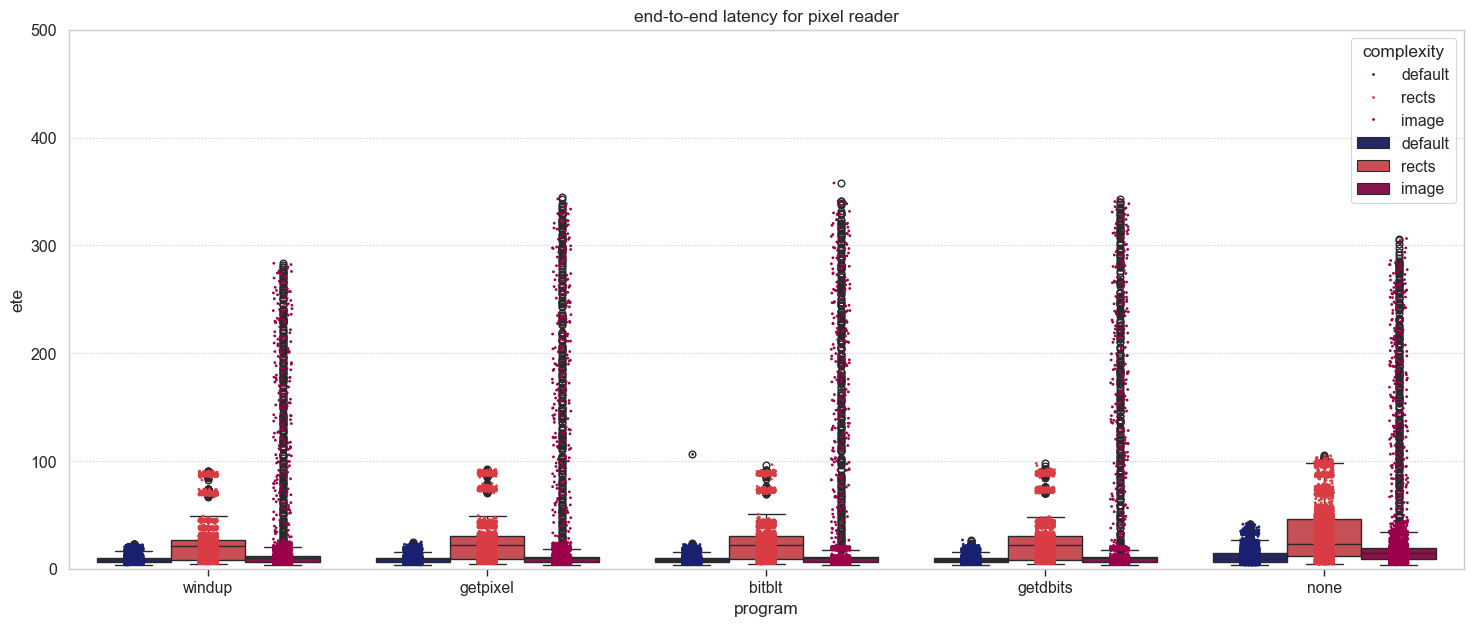

In [288]:
plot = sns.stripplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True, size=2)
plot = sns.boxplot(data=data, x='program', y='ete', hue='complexity', palette=PALETTE_THREE, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True)
plot.set_ylim(0, 500)
plot.set_title('end-to-end latency for pixel reader')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\3632786208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\3632786208.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_small = sns.boxplot(ax=axs[2], data=data_image, x='program', y='ete', palette=PALETTE_HEIDENELKE_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\3632786208.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

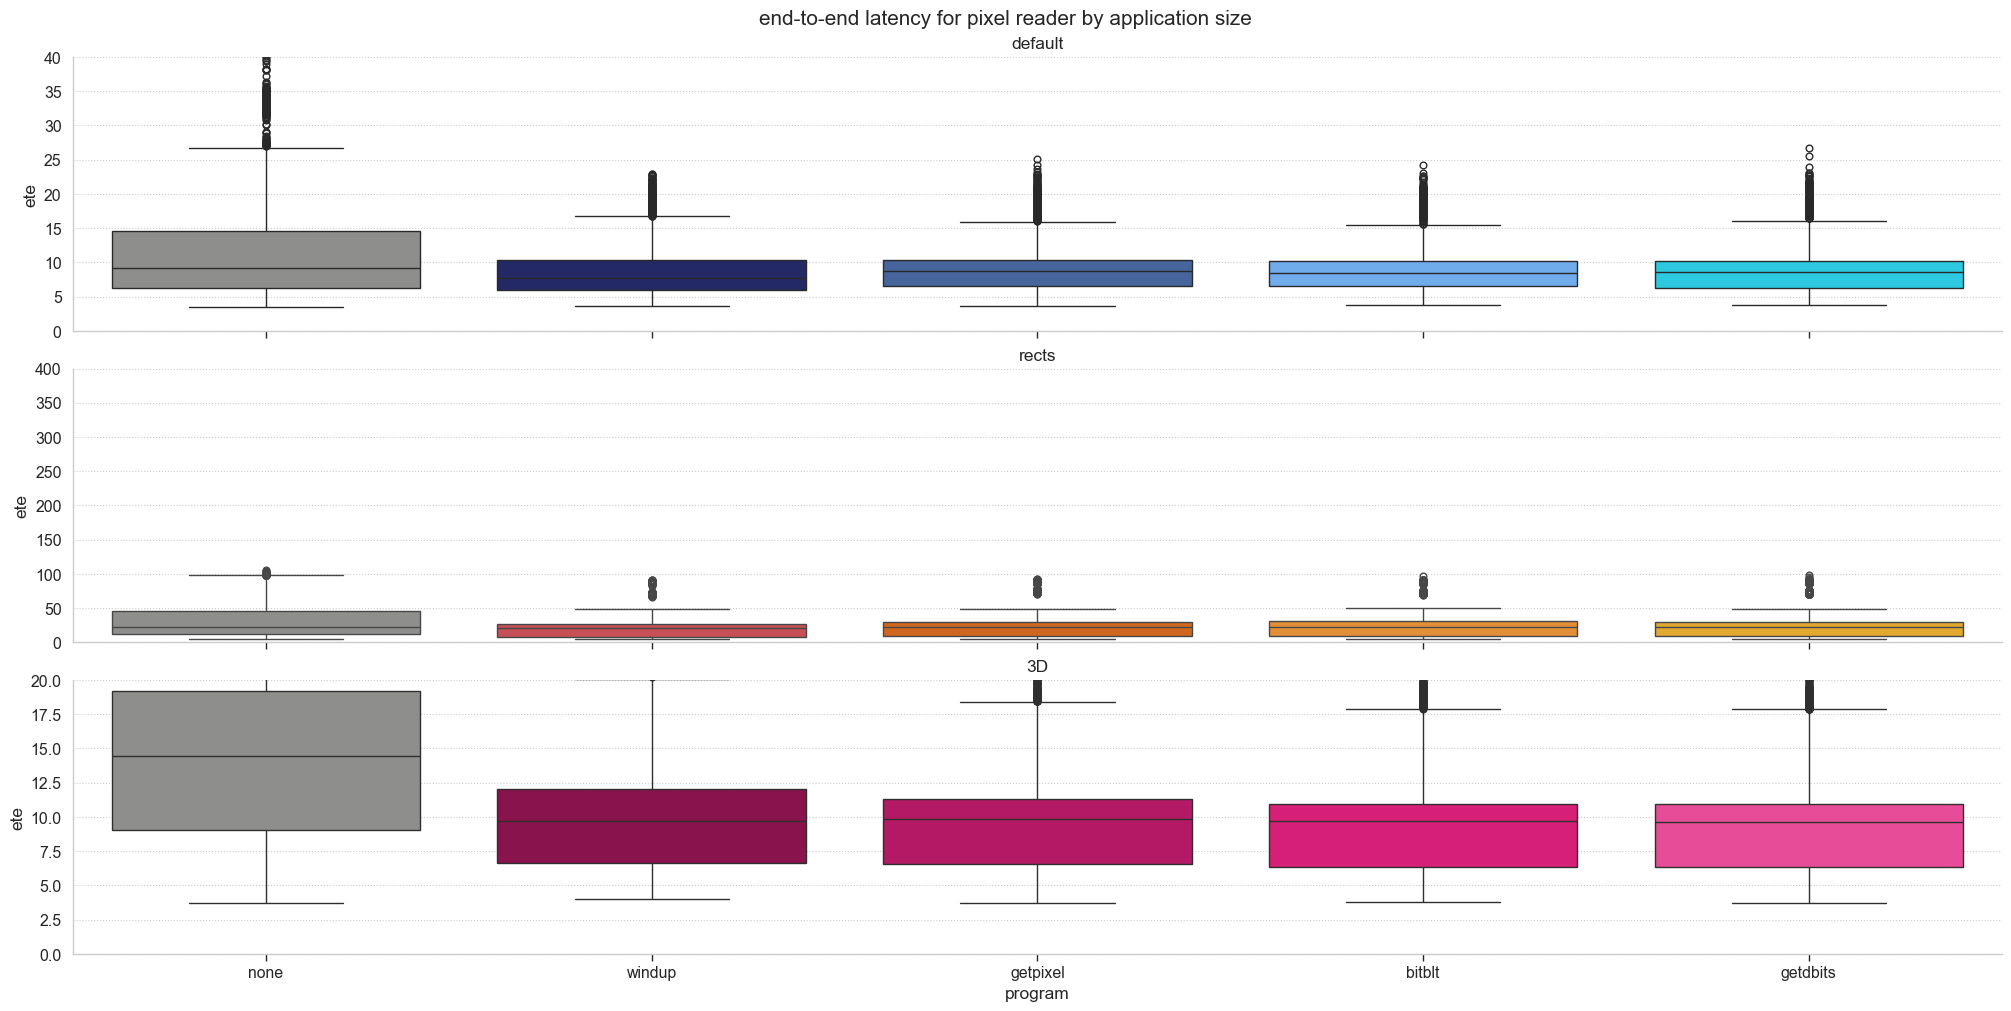

In [289]:
fig, axs = plt.subplots(3, 1, layout='constrained', sharex=True, figsize=(20, 10))
fig.suptitle("end-to-end latency for pixel reader by application size")

#plot_fs = sns.stripplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_fs.set_ylim(0, 40)
plot_fs.set_title('default')

plot_small = sns.boxplot(ax=axs[2], data=data_image, x='program', y='ete', palette=PALETTE_HEIDENELKE_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 100)
plot_small.set_title('image')

#plot_nfs = sns.stripplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_nfs = sns.boxplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_REDS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_nfs.set_ylim(0, 400)
plot_nfs.set_title('rects')

#plot_small = sns.stripplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_W_NREUTRAL_GREEN, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_small = sns.boxplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_HEIDENELKE_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 20)
plot_small.set_title('3D')

sns.despine(bottom = False, left = False)

## End-to-end latencies for each framework

### frameworks separately

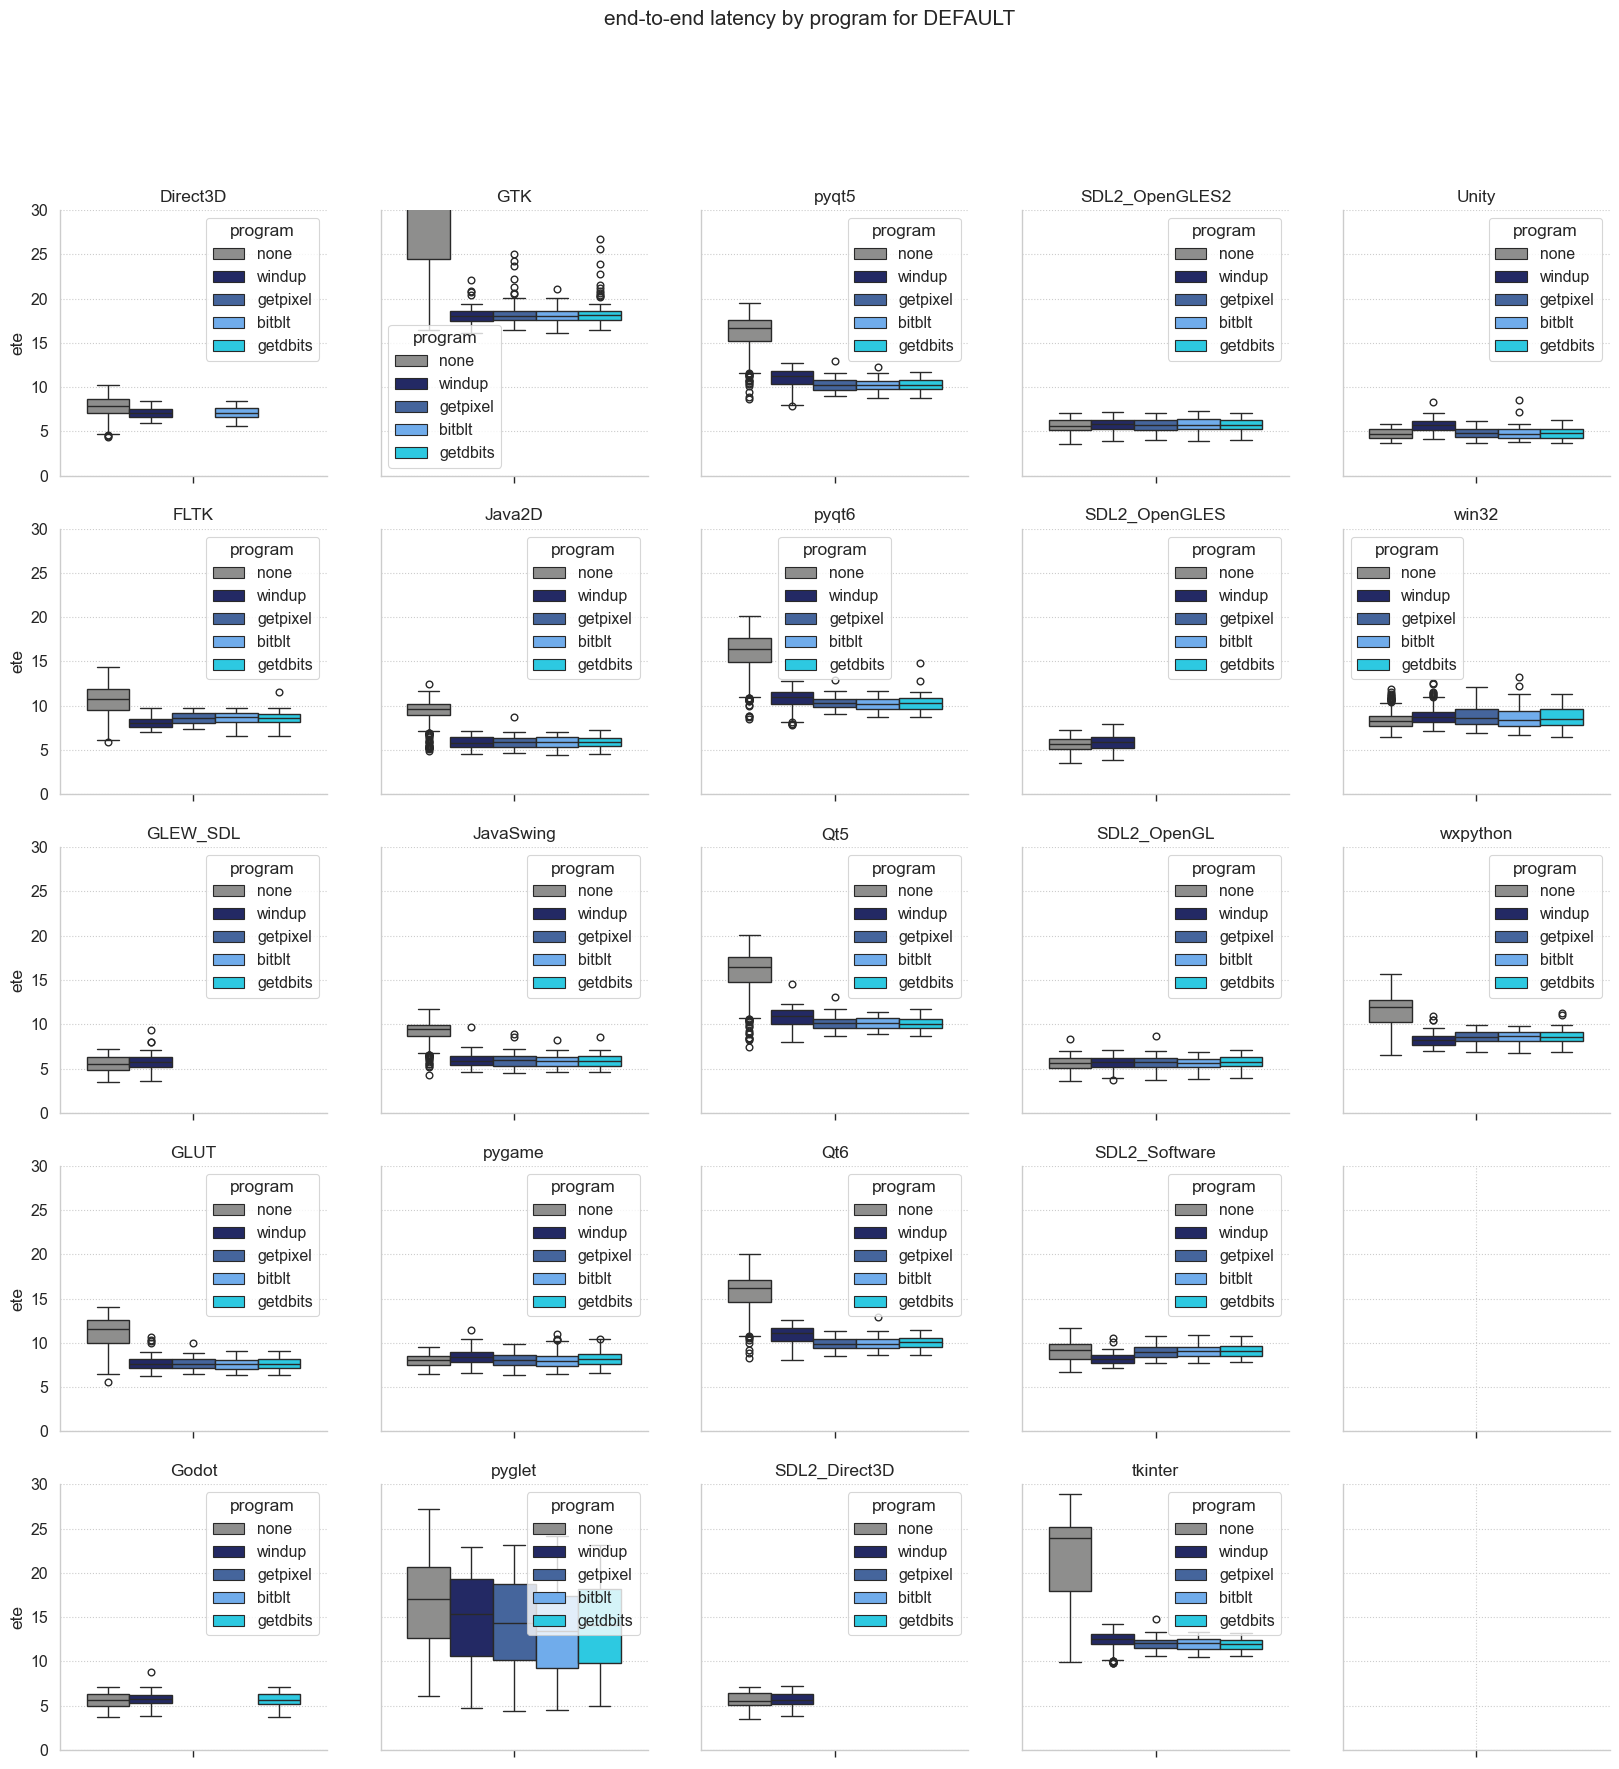

In [290]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for DEFAULT")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_default[data_default['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_BLUES_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

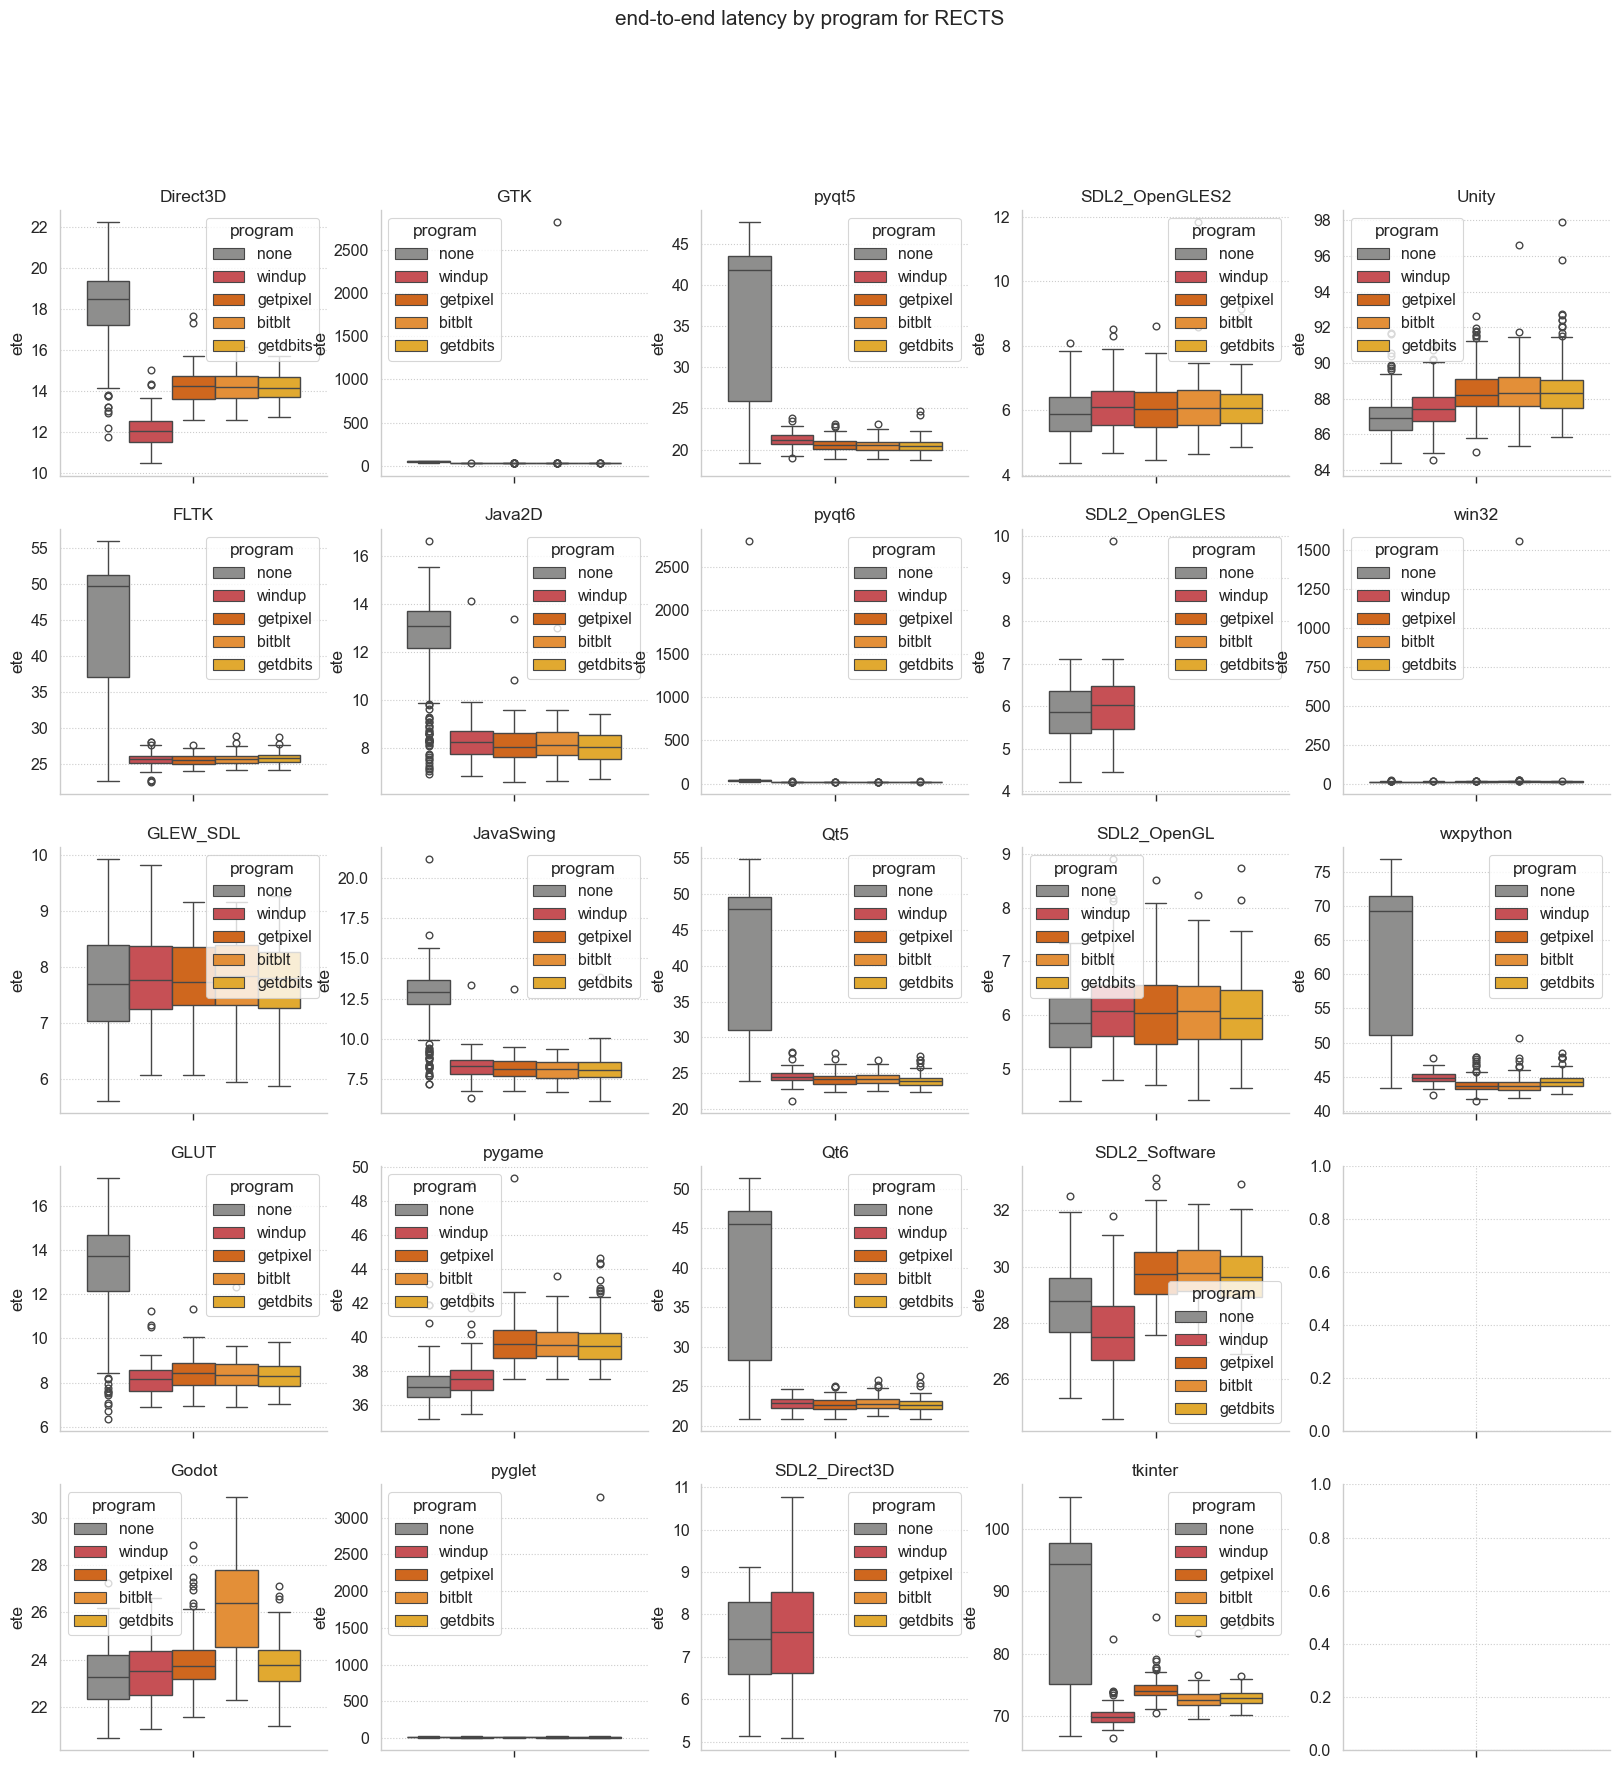

In [291]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True)
fig.suptitle("end-to-end latency by program for RECTS")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_rects[data_rects['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_REDS_W)
    axes[x, y].set_title(framework)
    #axes[x, y].set_ylim(0, 100)

sns.despine(bottom = False, left = False)

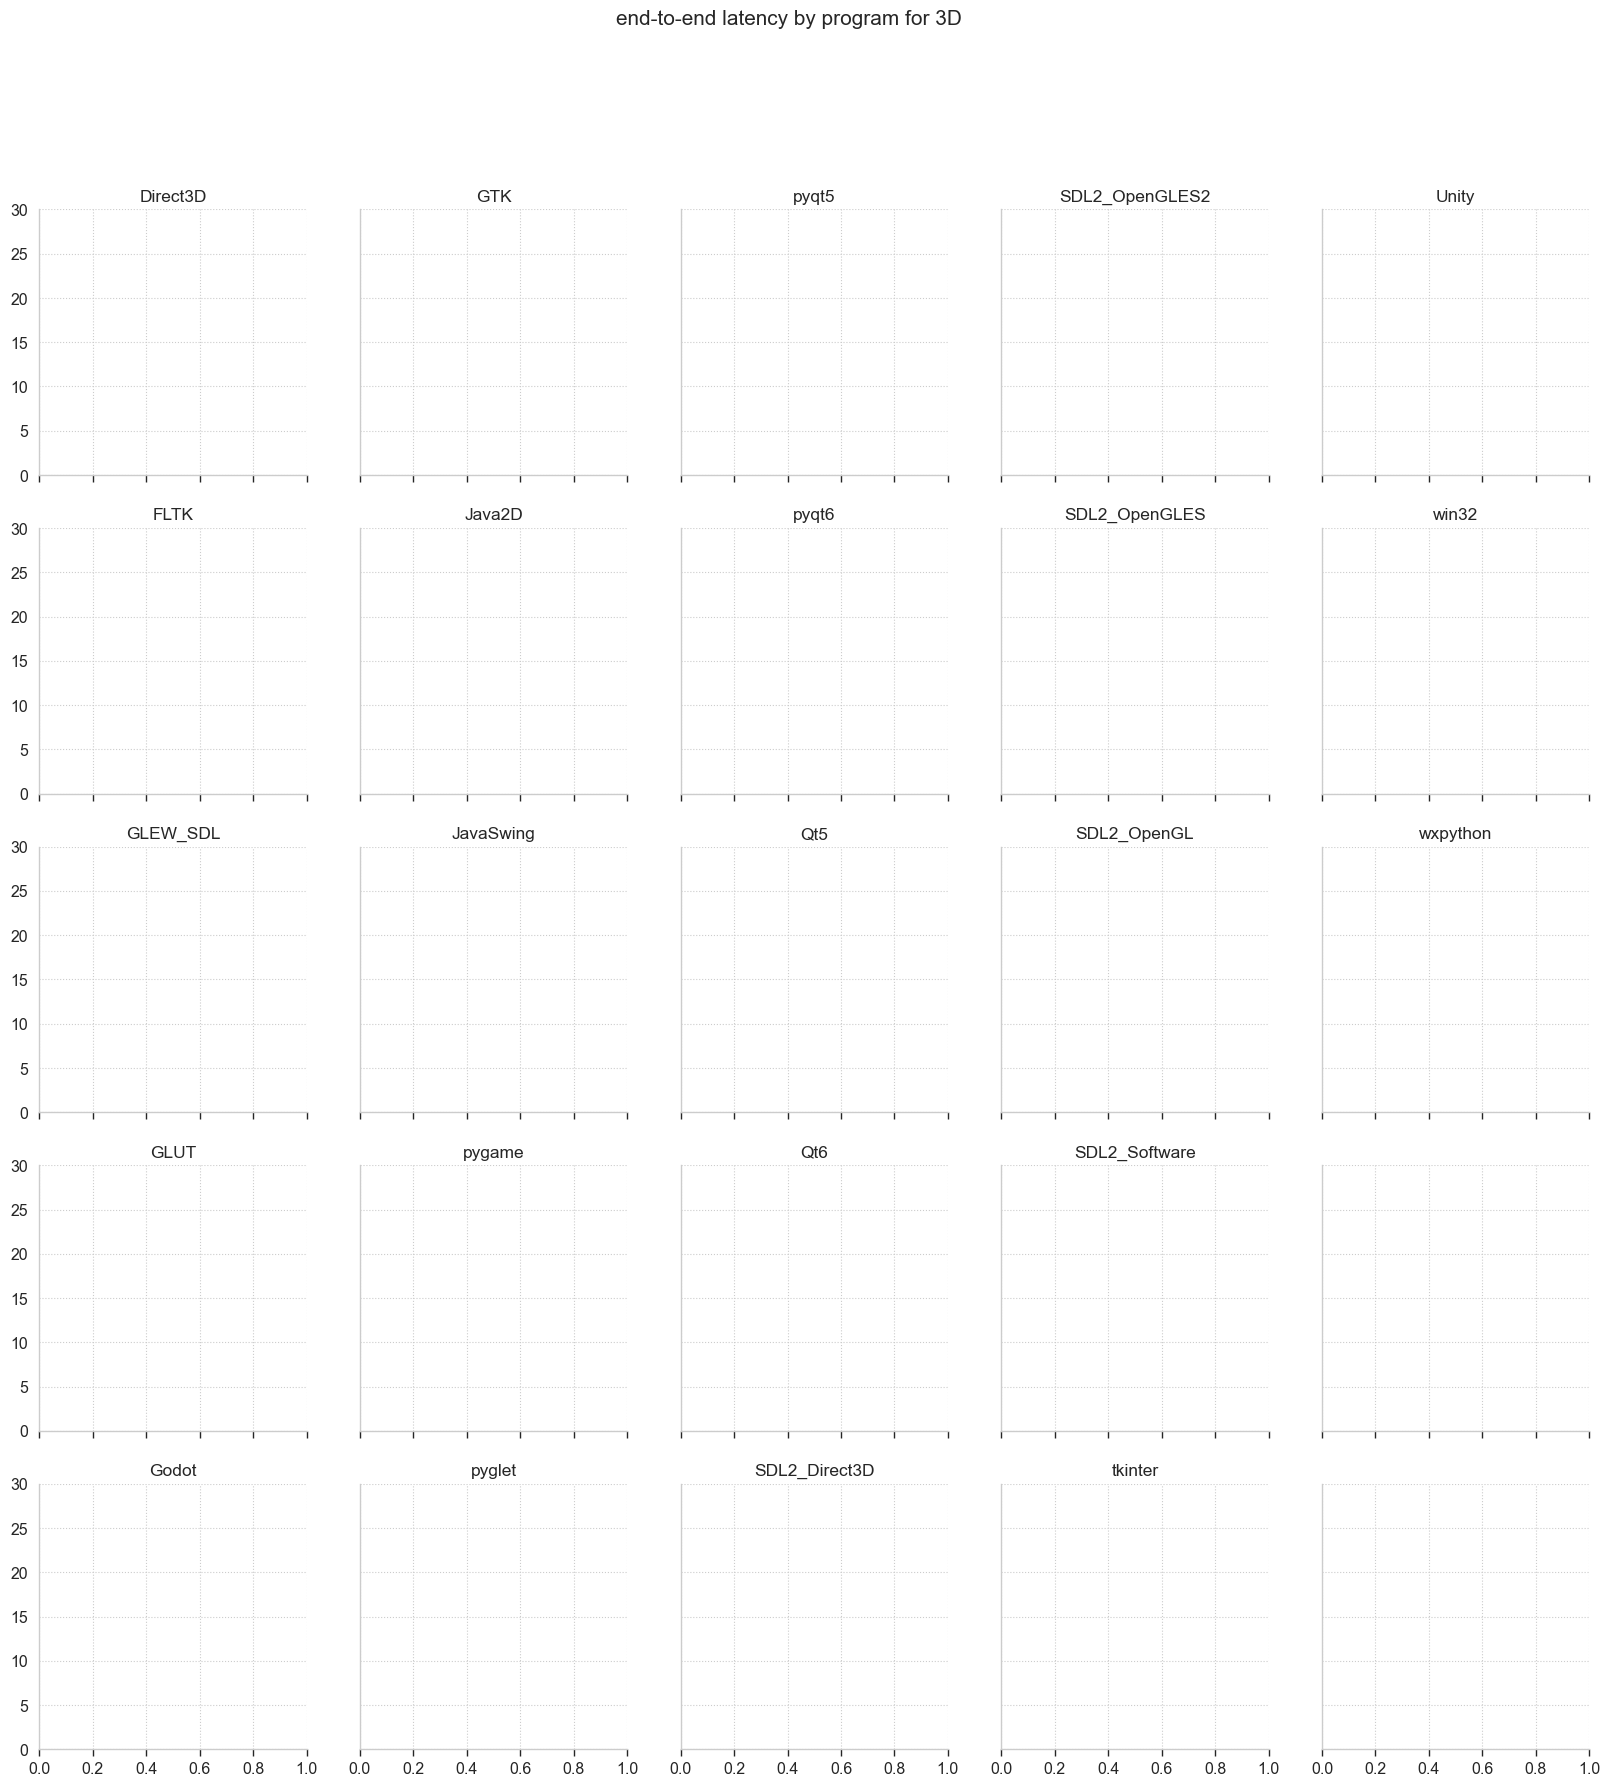

In [292]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for 3D")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_3D[data_3D['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_HEIDENELKE_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

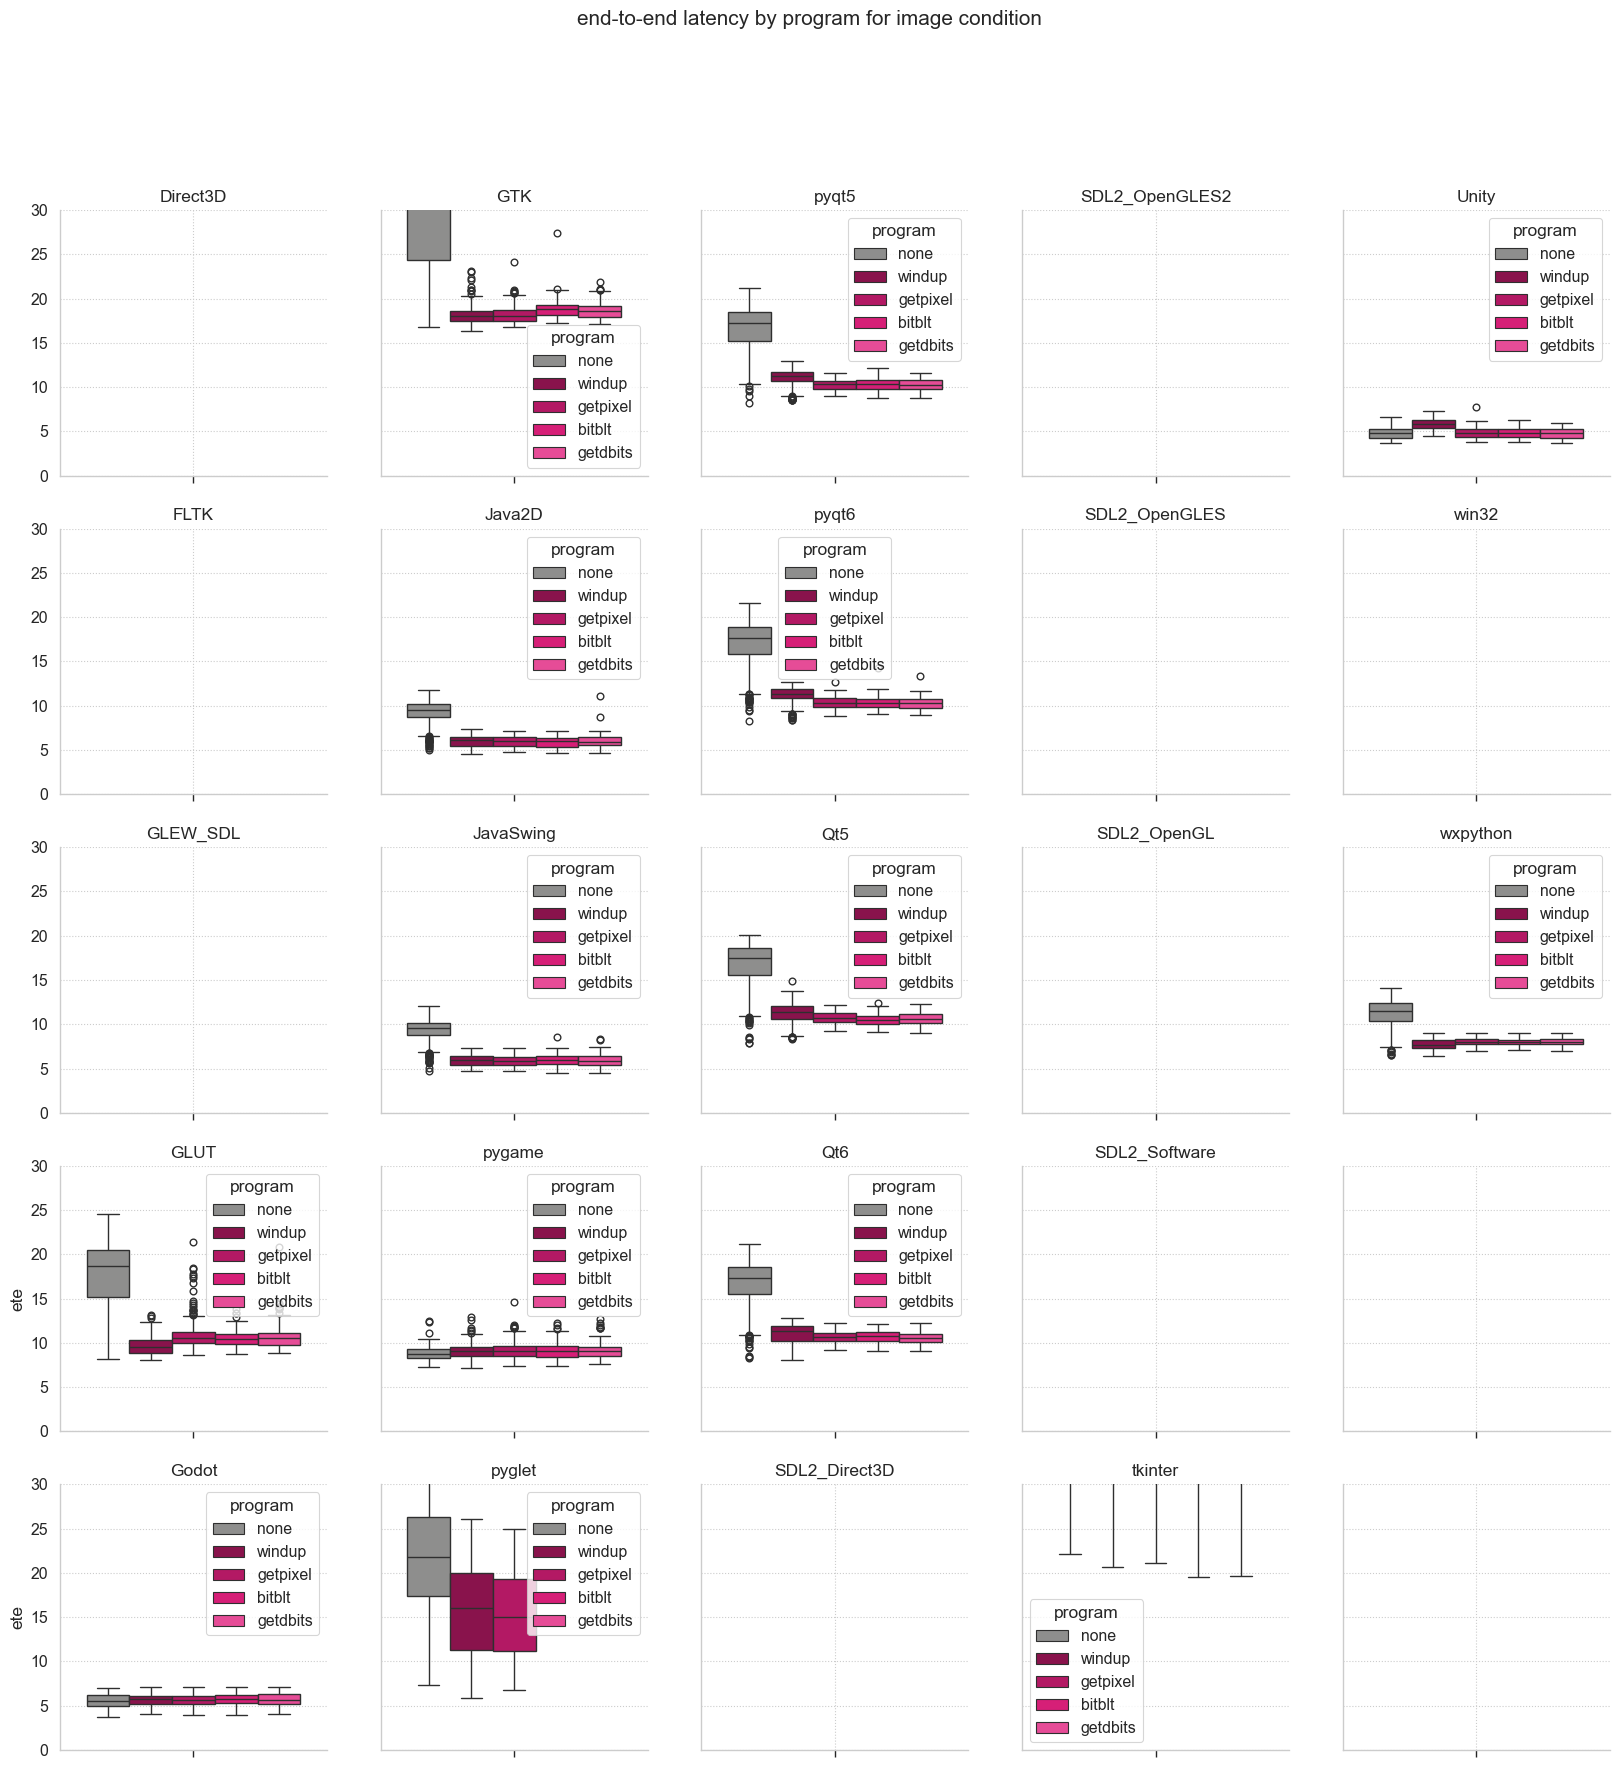

In [293]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for image condition")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_image[data_image['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_HEIDENELKE_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

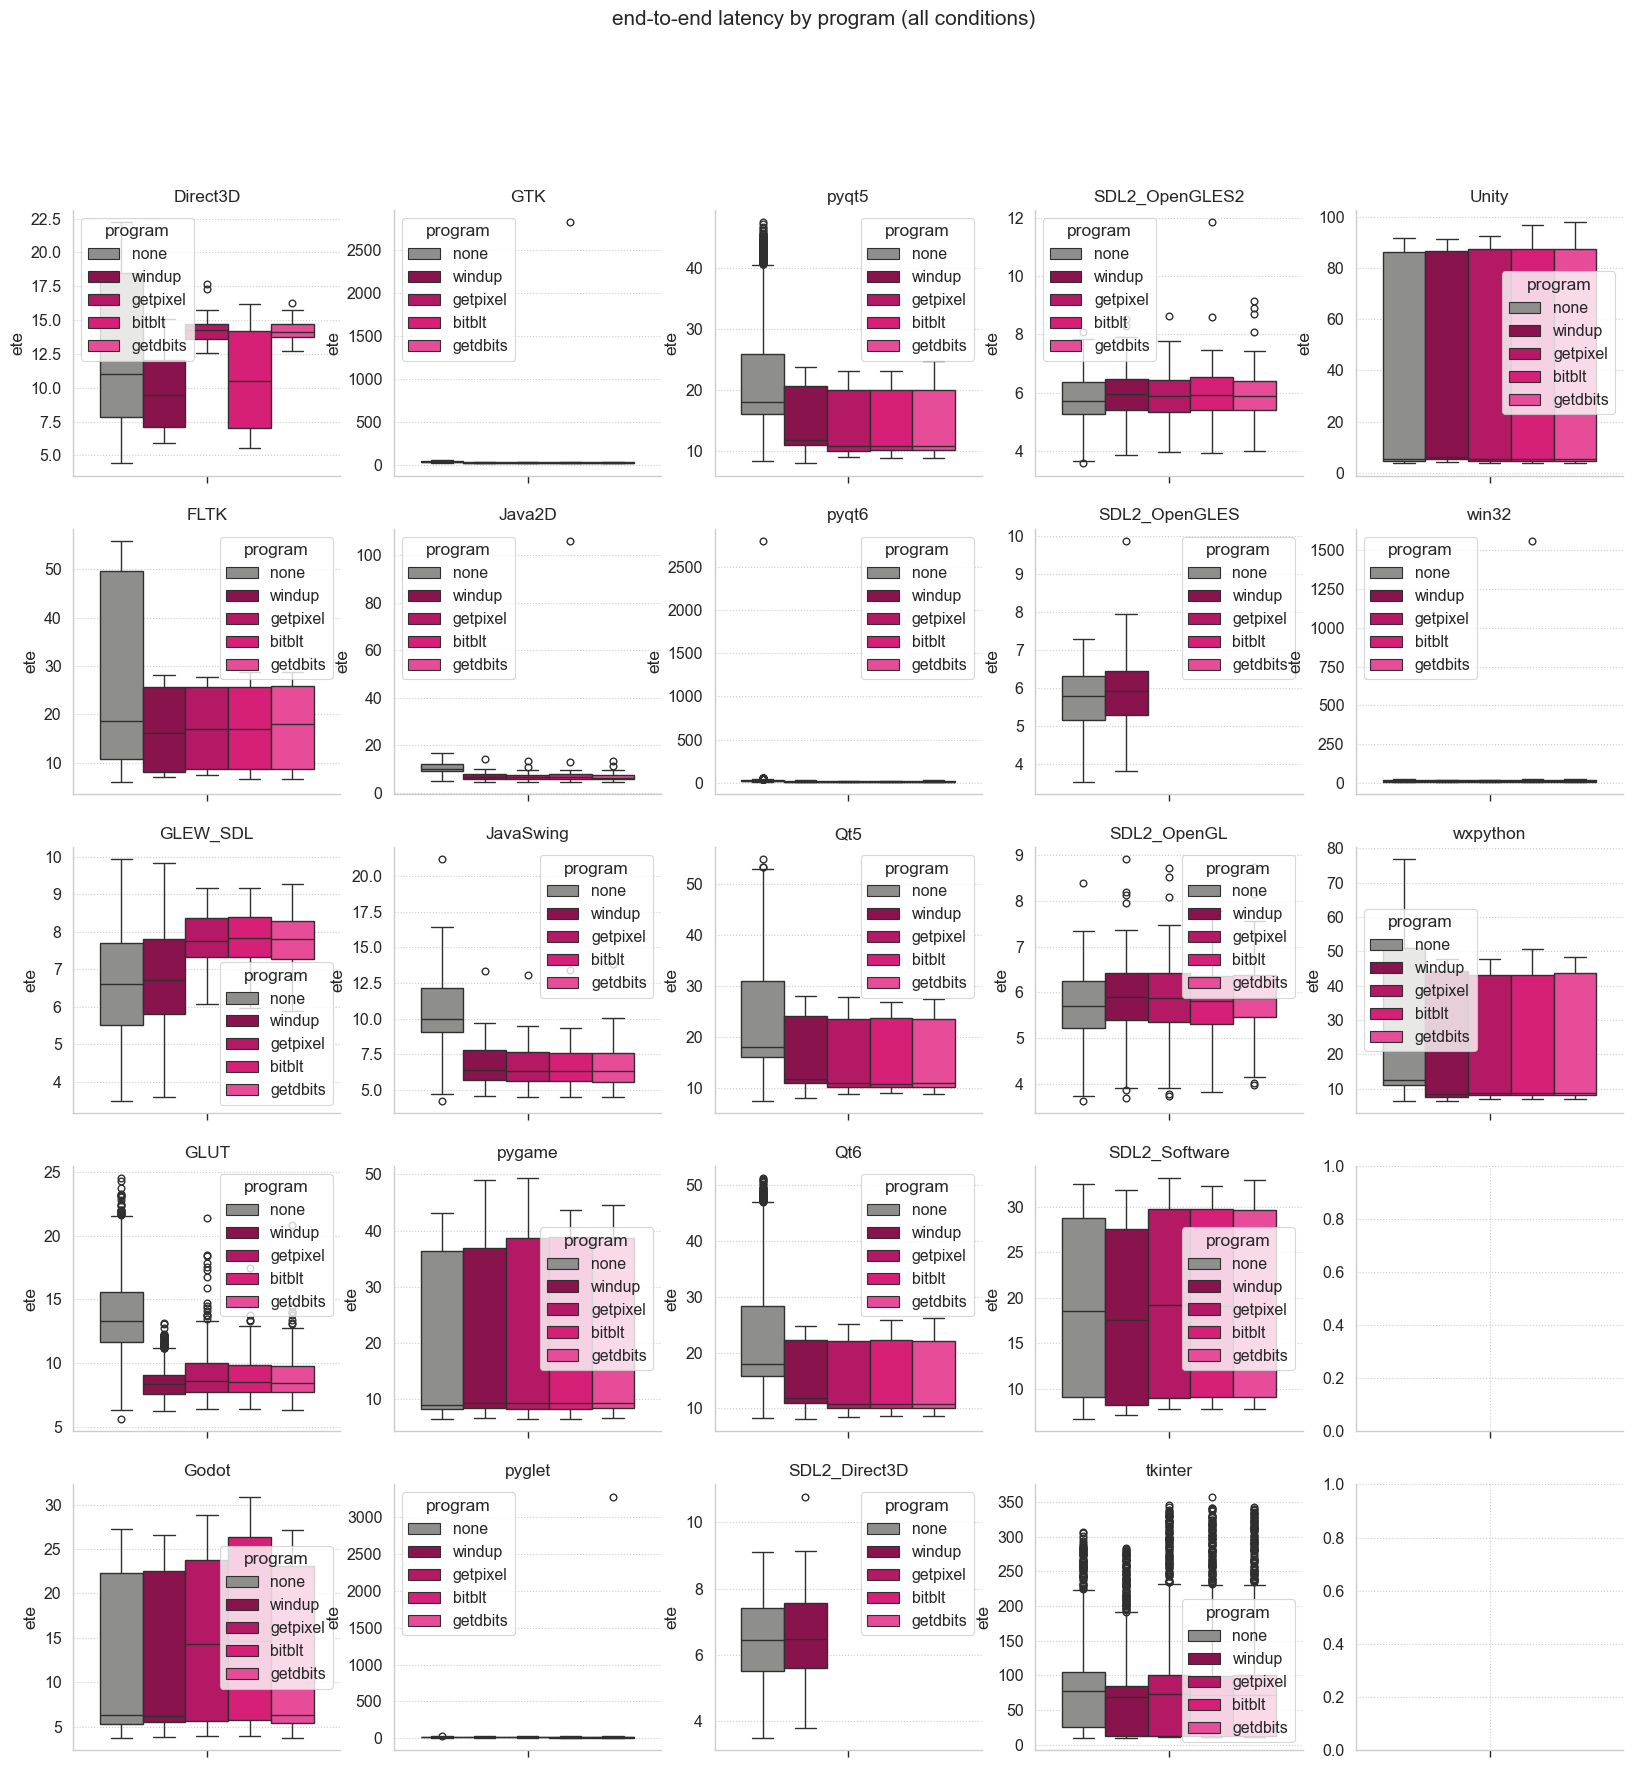

In [294]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=False)
fig.suptitle("end-to-end latency by program (all conditions)")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data[data['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_HEIDENELKE_W)
    axes[x, y].set_title(framework)
    #axes[x, y].set_ylim(0, 30)

sns.despine(bottom = False, left = False)

### overview

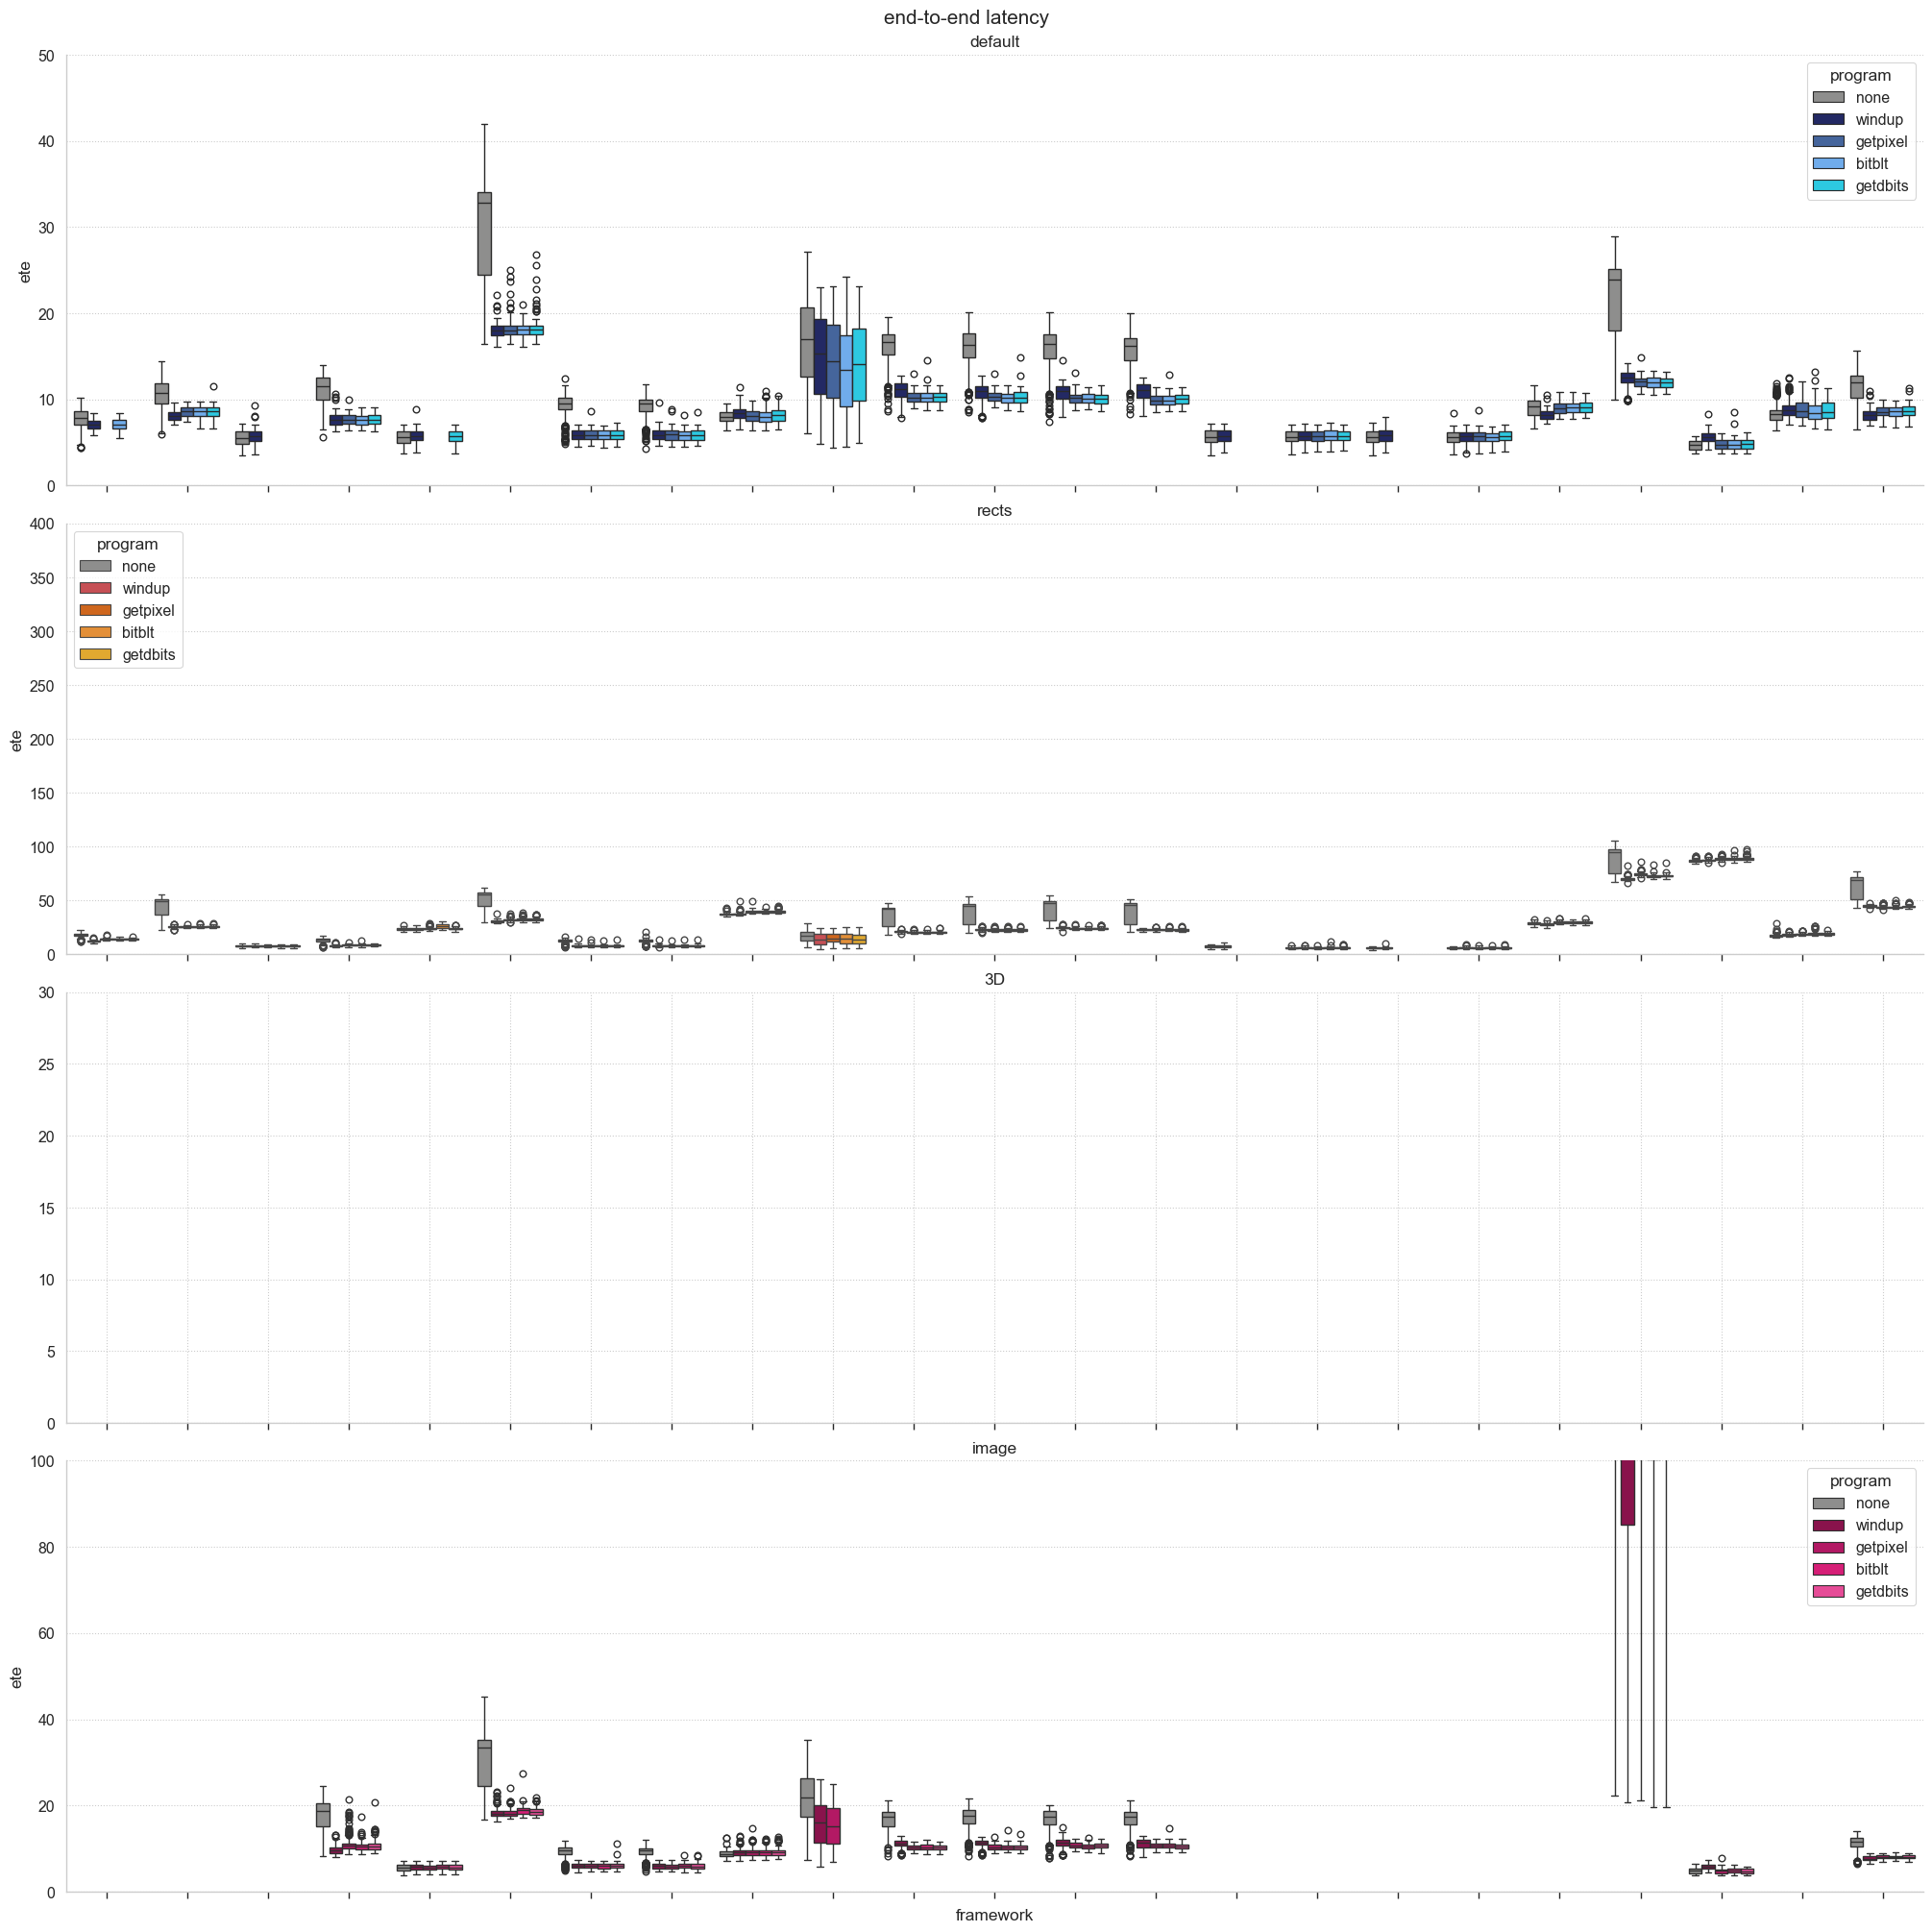

In [295]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.boxplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_nfs = sns.boxplot(ax=axs[1], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W)
plot_nfs.set_title('rects')
axs[1].set_ylim(0, 400)

plot_small = sns.boxplot(ax=axs[2], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W)
plot_small.set_title('3D')
axs[2].set_ylim(0, 30)

plot_small = sns.boxplot(ax=axs[3], data=data[data['complexity'] == 'image'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W)
plot_small.set_title('image')
axs[3].set_ylim(0, 100)

axs[3].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

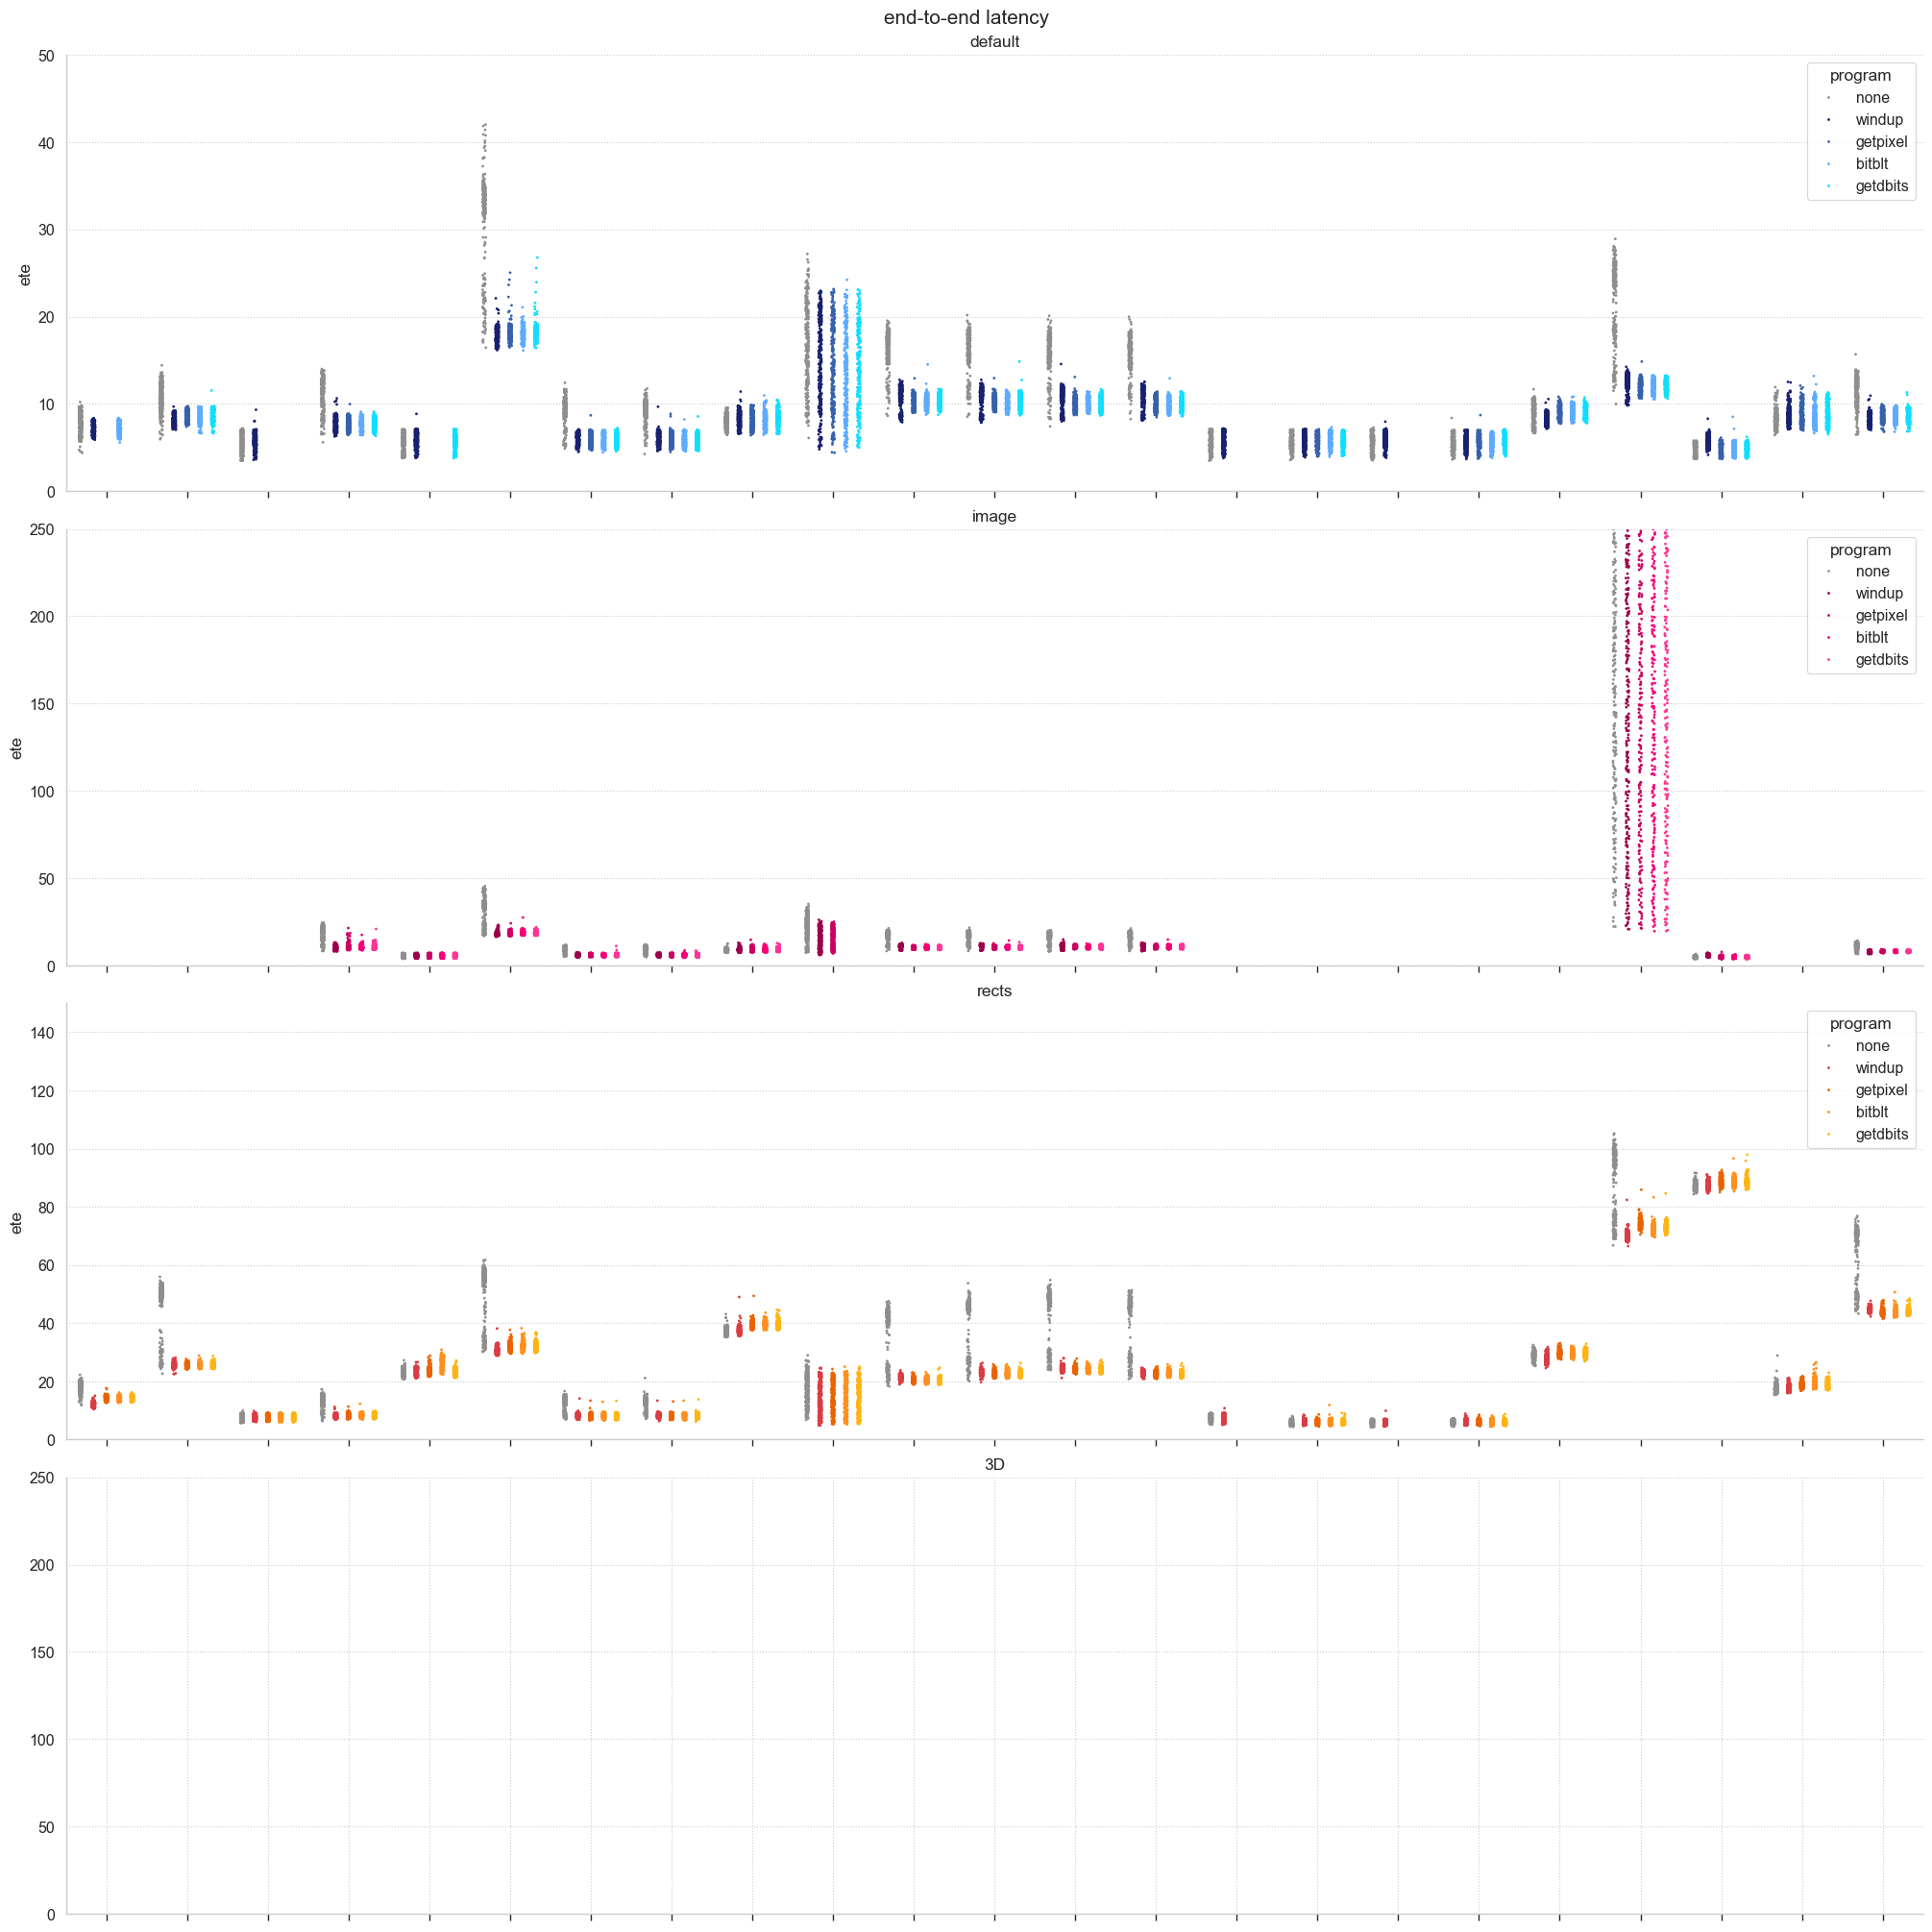

In [296]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.stripplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W, size=2)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_small = sns.stripplot(ax=axs[1], data=data[data['complexity'] == 'image'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_small.set_title('image')
axs[1].set_ylim(0, 250)

plot_nfs = sns.stripplot(ax=axs[2], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W, size=2)
plot_nfs.set_title('rects')
axs[2].set_ylim(0, 150)

plot_small = sns.stripplot(ax=axs[3], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_small.set_title('3D')
axs[3].set_ylim(0, 250)

axs[3].set_xticklabels(axs[2].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

## End-to-end latency: Descriptive Stats

### DEFAULT

In [297]:
data_temp = data_default.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_default_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_default_desc.describe())

ValueError: cannot reindex on an axis with duplicate labels

### RECTS

In [298]:
data_temp = data_rects.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_rects_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_rects_desc.describe())

ValueError: cannot reindex on an axis with duplicate labels

### 3D

In [299]:
data_temp = data_3D.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_3D_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

# data_none = data_temp[data_temp['program'] == 'none']
# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

# data_3D_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_3D_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


### OVERALL

In [300]:
data_temp = data.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

# data_none = data_temp[data_temp['program'] == 'none']
# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

# data_desc = pd.concat([data_none['ete'], data_windup['ete'], data_getpixel['ete'], data_bitblt['ete'], data_getdbits['ete']], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,15028.000000,14996.000000,13250.000000,13250.000000,13250.000000
mean,22.081969,16.959918,19.087762,19.253588,19.114309
std,36.163950,24.832399,30.370302,41.063573,41.571271
min,3.490000,3.586000,3.682000,3.777000,3.719000
25%,7.651500,6.701000,7.567750,7.373000,7.276000
50%,13.078000,9.002000,10.058000,9.834000,9.865000
75%,23.268000,18.316250,20.301500,20.231750,20.132000
max,2802.602000,283.460000,345.292000,2820.288000,3284.645000


### Default by framework

In [301]:
data_temp = data_default.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

medians = pd.DataFrame(columns=['framework', 'none', 'windup', 'windup_difference', 'getpixel', 'getpixel_difference', 'bitblt', 'bitblt_difference', 'getdbits', 'getdbits_difference'])
length = 0
for i, framework in enumerate(framework_list):
    lenght = i
    median_none = data_none[data_none['framework'] == framework]['ete'].median()
    median_windup = data_windup[data_windup['framework'] == framework]['ete'].median()
    median_getpixel = data_getpixel[data_getpixel['framework'] == framework]['ete'].median()
    median_bitblt = data_bitblt[data_bitblt['framework'] == framework]['ete'].median()
    median_getdbits = data_getdbits[data_getdbits['framework'] == framework]['ete'].median()    
    medians.loc[i] = [framework, median_none, median_windup, median_windup - median_none, median_getpixel, median_getpixel- median_none, median_bitblt, median_bitblt - median_none, median_getdbits, median_getdbits - median_none]

medians.loc[-1] = ['mean', medians['none'].mean(), medians['windup'].mean(), medians['windup_difference'].mean(), medians['getpixel'].mean(), medians['getpixel_difference'].mean(), medians['bitblt'].mean(), medians['bitblt_difference'].mean(), medians['getdbits'].mean(), medians['getdbits_difference'].mean()]


display(medians)

,framework,none,windup,windup_difference,getpixel,getpixel_difference,bitblt,bitblt_difference,getdbits,getdbits_difference
0,Direct3D,7.846000,7.093500,-0.752500,NaN,NaN,7.036000,-0.810000,NaN,NaN
1,FLTK,10.741500,8.040500,-2.701000,8.614500,-2.12700,8.667000,-2.074500,8.650500,-2.091000
2,GLEW_SDL,5.517000,5.791000,0.274000,NaN,NaN,NaN,NaN,NaN,NaN
3,GLUT,11.571500,7.595500,-3.976000,7.615000,-3.95650,7.660000,-3.911500,7.660500,-3.911000
4,Godot,5.678500,5.742500,0.064000,NaN,NaN,NaN,NaN,5.695000,0.016500
5,GTK,32.816500,18.040500,-14.776000,18.045000,-14.77150,18.060000,-14.756500,18.124500,-14.692000
6,Java2D,9.567000,5.822000,-3.745000,5.895500,-3.67150,5.887000,-3.680000,5.887000,-3.680000
7,JavaSwing,9.483000,5.886500,-3.596500,5.911500,-3.57150,5.804000,-3.679000,5.838000,-3.645000
8,pygame,8.010000,8.427500,0.417500,8.044500,0.03450,8.004000,-0.006000,8.231500,0.221500
9,pyglet,17.024500,15.352000,-1.672500,14.397500,-2.62700,13.452500,-3.572000,14.095000,-2.929500


In [302]:
print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{lrrrrrrrrr}
\toprule
framework & none & windup & windup_difference & getpixel & getpixel_difference & bitblt & bitblt_difference & getdbits & getdbits_difference \\
\midrule
Direct3D & 7.85 & 7.09 & -0.75 & NaN & NaN & 7.04 & -0.81 & NaN & NaN \\
FLTK & 10.74 & 8.04 & -2.70 & 8.61 & -2.13 & 8.67 & -2.07 & 8.65 & -2.09 \\
GLEW_SDL & 5.52 & 5.79 & 0.27 & NaN & NaN & NaN & NaN & NaN & NaN \\
GLUT & 11.57 & 7.60 & -3.98 & 7.62 & -3.96 & 7.66 & -3.91 & 7.66 & -3.91 \\
Godot & 5.68 & 5.74 & 0.06 & NaN & NaN & NaN & NaN & 5.70 & 0.02 \\
GTK & 32.82 & 18.04 & -14.78 & 18.05 & -14.77 & 18.06 & -14.76 & 18.12 & -14.69 \\
Java2D & 9.57 & 5.82 & -3.75 & 5.90 & -3.67 & 5.89 & -3.68 & 5.89 & -3.68 \\
JavaSwing & 9.48 & 5.89 & -3.60 & 5.91 & -3.57 & 5.80 & -3.68 & 5.84 & -3.65 \\
pygame & 8.01 & 8.43 & 0.42 & 8.04 & 0.03 & 8.00 & -0.01 & 8.23 & 0.22 \\
pyglet & 17.02 & 15.35 & -1.67 & 14.40 & -2.63 & 13.45 & -3.57 & 14.09 & -2.93 \\
pyqt5 & 16.71 & 11.23 & -5.47 & 10.22 & -6.49 & 10.2

# Differences

In [303]:
data_running = data[data['program'] != 'none']

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1503460235.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


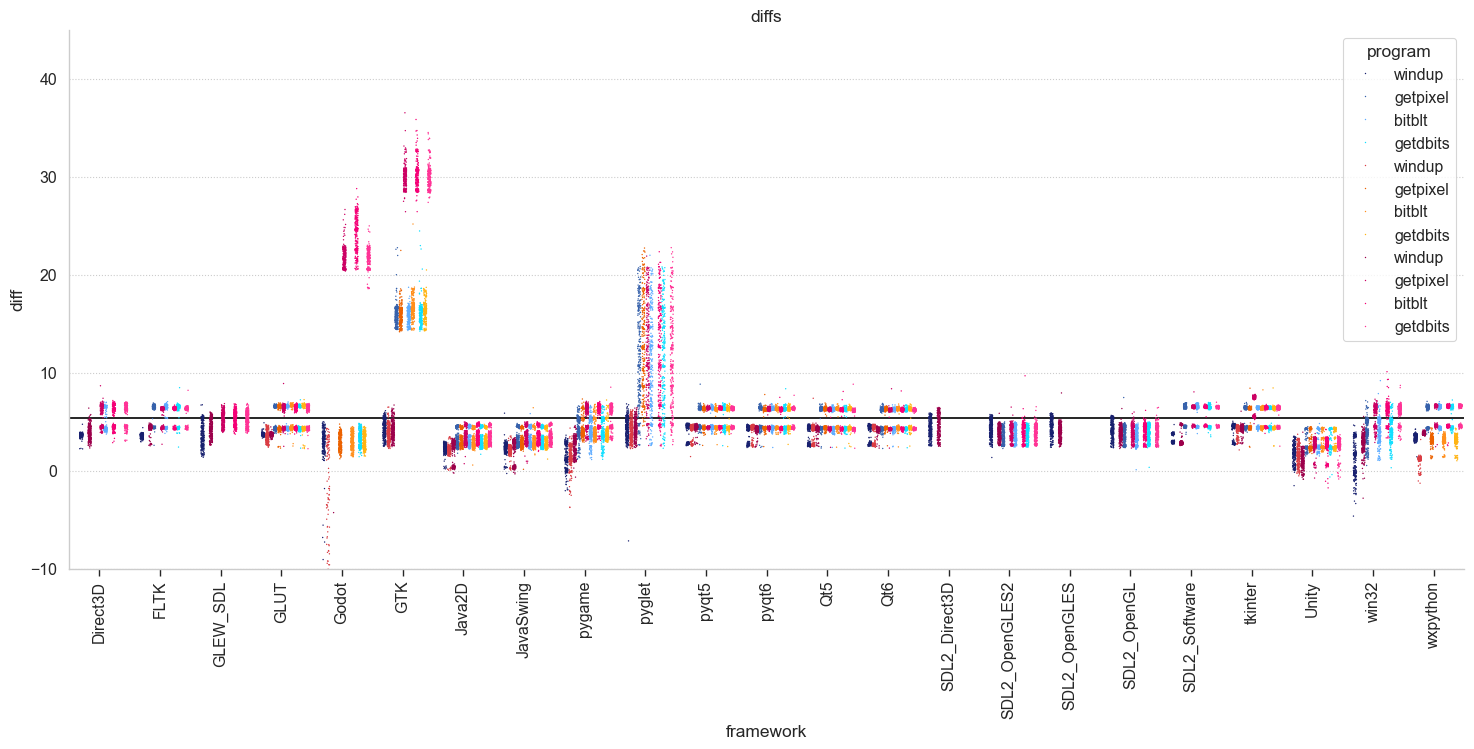

In [304]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_running[data_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'image'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.05)+trans, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == '3D'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()
# plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
#                       labels[2] + ', default', labels[3] + ', default',
#                       labels[4] + ', rects', labels[5] + ', rects',
#                       labels[6] + ', rects', labels[7] + ', rects'], markerscale=5.)
plot.set_title('diffs')
sns.despine(bottom = False, left = False)

In [305]:
# data_temp = data.copy()

# data_windup = data_temp[data_temp['program'] == 'windup']
# data_getpixel = data_temp[data_temp['program'] == 'getpixel']
# data_bitblt = data_temp[data_temp['program'] == 'bitblt']
# data_getdbits = data_temp[data_temp['program'] == 'getdbits']

data_temp = data.copy()

# data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'diff'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'diff'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'diff'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'diff'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'diff'].reset_index(drop=True)

data_desc = pd.concat([data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])


#data_desc = pd.concat([data_windup['diff'], data_getpixel['diff'], data_bitblt['diff'], data_getdbits['diff']], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,windup,getpixel,bitblt,getdbits
count,14996.000000,13250.000000,13250.000000,13250.000000
mean,1.460588,6.404354,6.606837,6.406951
std,95.728177,5.140488,28.328372,28.899038
min,-8389.710000,-0.753000,-1.754000,-0.847000
25%,2.599000,3.929250,3.970000,3.768000
50%,3.629000,4.592500,4.551000,4.506000
75%,4.378000,6.461750,6.424000,6.411000
max,7.931000,36.519000,2818.179000,3282.391000


In [306]:
print(data_desc.describe().to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{lrrrr}
\toprule
 & windup & getpixel & bitblt & getdbits \\
\midrule
count & 14996.00 & 13250.00 & 13250.00 & 13250.00 \\
mean & 1.46 & 6.40 & 6.61 & 6.41 \\
std & 95.73 & 5.14 & 28.33 & 28.90 \\
min & -8389.71 & -0.75 & -1.75 & -0.85 \\
25% & 2.60 & 3.93 & 3.97 & 3.77 \\
50% & 3.63 & 4.59 & 4.55 & 4.51 \\
75% & 4.38 & 6.46 & 6.42 & 6.41 \\
max & 7.93 & 36.52 & 2818.18 & 3282.39 \\
\bottomrule
\end{tabular}



C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1565375997.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot_windup = sns.stripplot(ax=axs[0], data=data_running[data_running['program'] == 'windup'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_BLUES_W, size=2)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1565375997.py:10: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot_getpixel = sns.stripplot(ax=axs[1], data=data_running[data_running['program'] == 'getpixel'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_REDS_W, size=2)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_25532\1565375997.py:16: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot_bitblt = sns.stripplot(ax=

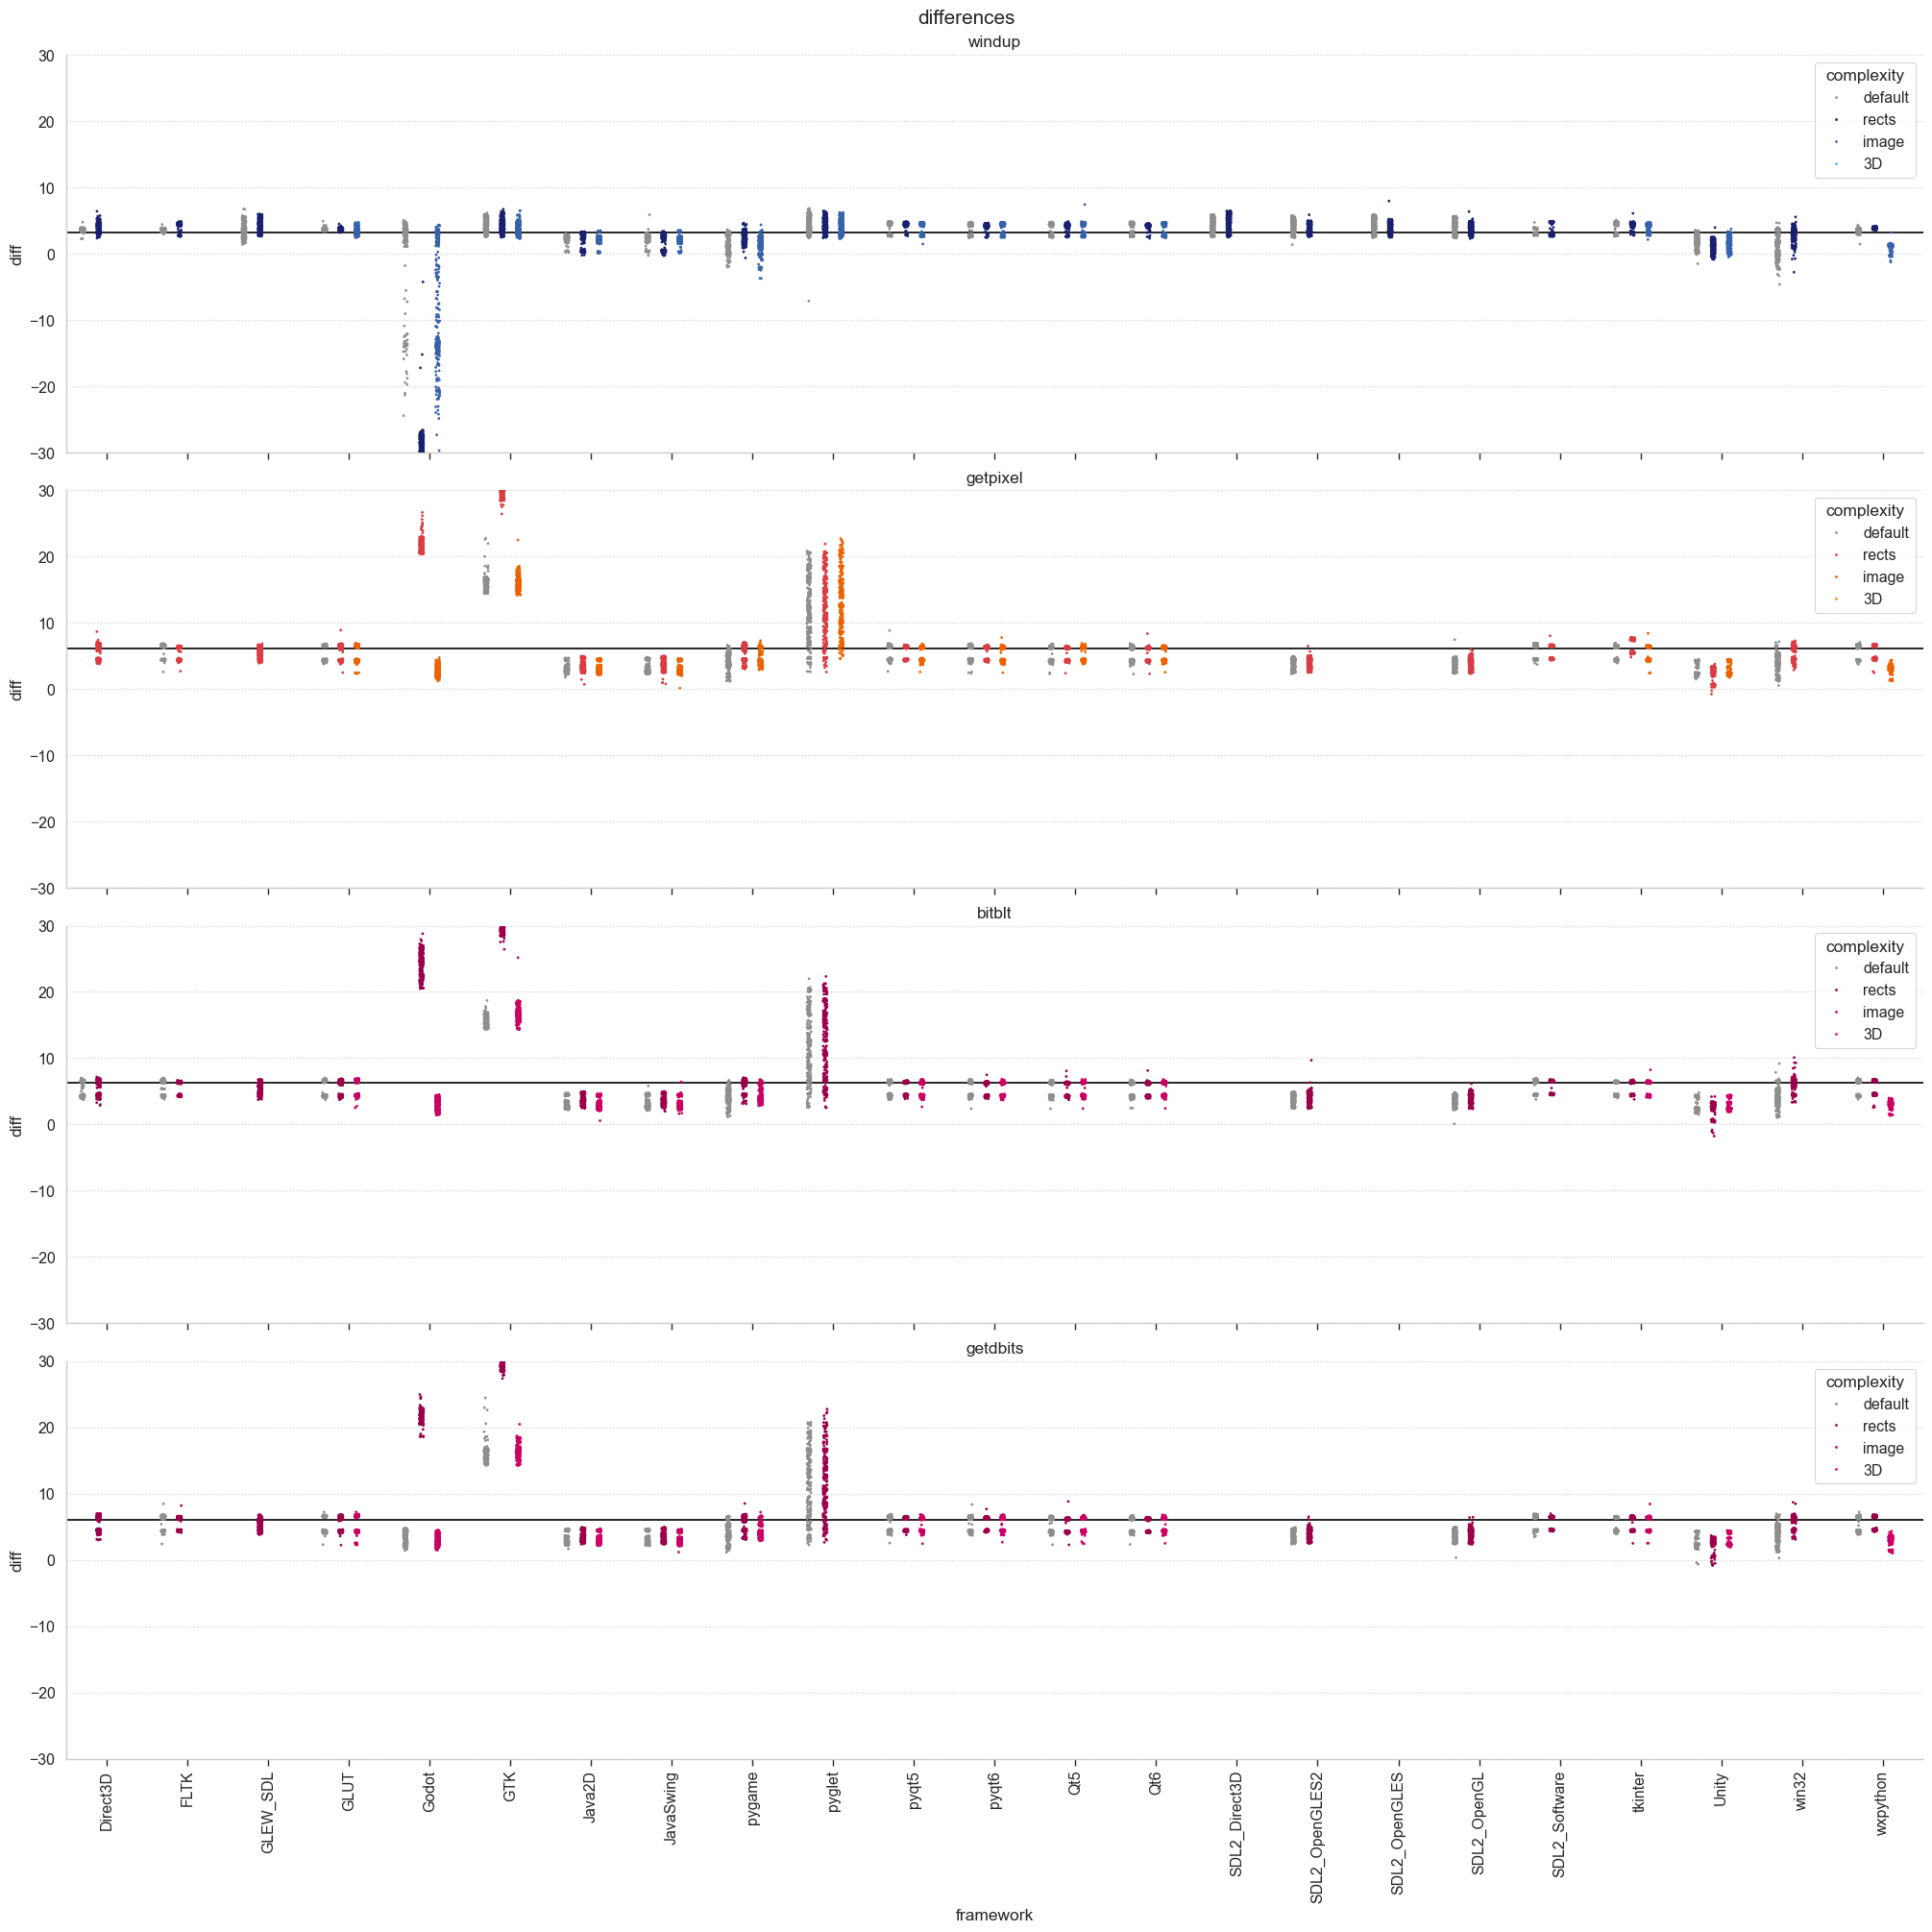

In [307]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("differences")

plot_windup = sns.stripplot(ax=axs[0], data=data_running[data_running['program'] == 'windup'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_BLUES_W, size=2)
plot_windup.set_title('windup')
axs[0].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['windup_fullscreen']), 1) / 1000
axs[0].axhline(agg_mean, color='black')

plot_getpixel = sns.stripplot(ax=axs[1], data=data_running[data_running['program'] == 'getpixel'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_REDS_W, size=2)
plot_getpixel.set_title('getpixel')
axs[1].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['getpixel']), 1) / 1000
axs[1].axhline(agg_mean, color='black')

plot_bitblt = sns.stripplot(ax=axs[2], data=data_running[data_running['program'] == 'bitblt'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_bitblt.set_title('bitblt')
axs[2].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['bitblt']), 1) / 1000
axs[2].axhline(agg_mean, color='black')

plot_getdbits = sns.stripplot(ax=axs[3], data=data_running[data_running['program'] == 'getdbits'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_getdbits.set_title('getdbits')
axs[3].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['getdbits']), 1) / 1000
axs[3].axhline(agg_mean, color='black')

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)